# Milestone project 2:

## Bulldozer Sales Prediction: Kaggle: Blue Book Bulldozer.

### Predicting the Sales price of bulldozer using ML.

* In this Notebook, we are going to go through an example ML project with the goal of predicting the sales priec.

#### 1. Problem Definition
> How well we can predict the future sales of bulldozer, geven it's characteristics and past data of how much similiar bulldozer have been sold.

#### 2. Data:
> Data is downloaded from Kaggle Blue Book of Bulldozer compedition.

https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv - is the training set, which contains data through the **end of 2011.**

* Valid.csv - is the validation set, which contains data **from January 1, 2012 - April 30, 2012** You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv - is the test set, which won't be released until the last week of the competition. It contains data **from May 1, 2012 - November 2012**. Your score on the test set determines your final rank for the competition.

#### 3. Evaluation.
> The evaluation metric for this competition is the **RMSLE (root mean squared log error)** between the actual and predicted auction prices.

* **NOTE:** The goal for most regression evoluation metrics is to minimize the error. For example, our goal for this project to build a ML model which minimizes the **RMSLE**.

#### 4. Features.

> Kaggle provides a data dictionary which provides detailing of all features of dataset.

#### 5. Modeling.

#### 6. Expiriment.

In [95]:
#Import basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

In [96]:
#Import data(TrainAndValid.csv) into dataframe: 
#df_train = pd.read_csv('/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/Train.csv')

df = pd.read_csv("/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/TrainAndValid.csv"
                ,low_memory=False
                ,parse_dates=['saledate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [97]:
df.sample(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
390321,4374223,13000.0,1094945,17314,172,1.0,2005,4159.0,High,2010-02-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398362,6297394,11000.0,1919160,15961,149,2.0,2005,NaN,NaN,2011-11-19,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
281315,1883184,14500.0,1554843,20087,132,1.0,2006,NaN,NaN,2011-02-24,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
78533,1372288,16000.0,1479745,4123,132,1.0,1970,NaN,NaN,1999-03-24,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
23124,1219754,11000.0,1012325,9580,121,3.0,2004,2418.0,Medium,2011-10-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187461,1623262,24000.0,1231823,4578,132,1.0,1991,NaN,NaN,1994-03-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78580,1372405,8000.0,1453426,4137,132,6.0,1962,NaN,NaN,1997-04-15,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
260077,1794090,12000.0,1215293,9571,132,2.0,1000,NaN,NaN,1995-04-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131400,1484681,15000.0,1495540,3876,132,6.0,1976,NaN,NaN,1999-04-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
265903,1802314,14000.0,1533369,9508,132,2.0,1999,NaN,NaN,2003-03-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


## EDA:

In [98]:
#Check is there any missing values:

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [99]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

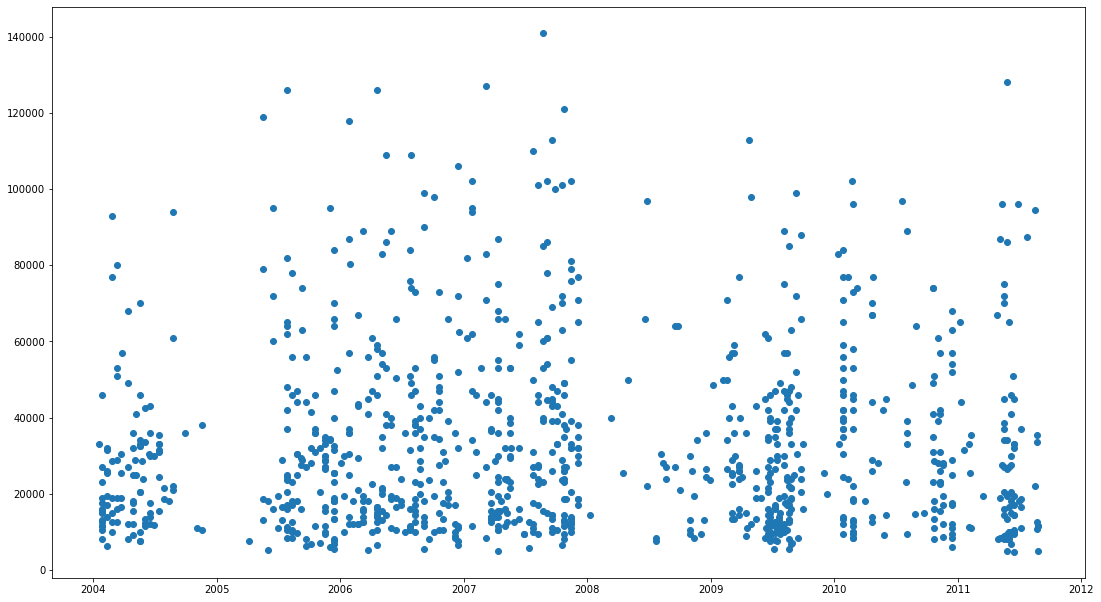

In [100]:
#Visualize the import features:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])


<AxesSubplot:ylabel='Frequency'>

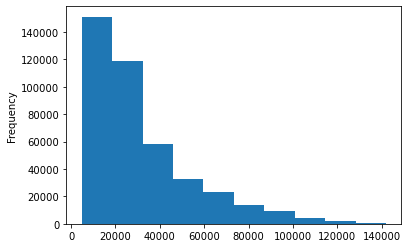

In [101]:
df.SalePrice.plot.hist()

In [102]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00


In [103]:
# Rearrange the saledate column to 2 column:

temp = df.pop('saledate')

df.insert(1, 'saledate', temp)

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium


In [104]:
# Sort the SaleDate:

df.sort_values(by=['saledate'], inplace=True)

df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [105]:
#make a copy of orginal DF:
df_tmp = df.copy()
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN


### Sort Dateframe by "SaleDate"

When working with Time serious data, it's always good idea to sore it.

In [106]:
#Sort date time column:

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(5)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [107]:
df.head(20)

,SalesID,saledate,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,1989-01-17,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,1989-01-31,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,1989-01-31,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,1989-01-31,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,1989-01-31,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115892,1453054,1989-01-31,36000.0,1117184,3854,132,99.0,1977,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
134080,1491298,1989-01-31,46000.0,1322436,4107,132,99.0,1987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
92294,1403411,1989-01-31,23000.0,1184544,7110,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31494,1263797,1989-01-31,17000.0,1526902,6953,132,99.0,1983,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
140922,1504404,1989-01-31,26000.0,1310407,4139,132,99.0,1975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


### Make a copy of OG dataframe

In [108]:
df_tmp = df.copy()
df_tmp

,SalesID,saledate,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,1989-01-17,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,1989-01-31,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,1989-01-31,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,1989-01-31,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,1989-01-31,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409901,6286556,2012-04-28,23000.0,1793587,4605,149,99.0,2006,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405777,6256957,2012-04-28,11500.0,1860454,6868,149,99.0,1000,NaN,NaN,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
411889,6312472,2012-04-28,11000.0,1820676,17231,149,99.0,2006,NaN,NaN,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
411890,6312473,2012-04-28,11000.0,1796787,17231,149,99.0,2006,NaN,NaN,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


## 4. Feature Engineering

In [109]:
# parse the year, month, day from saledate column into new column
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN


In [110]:

df_tmp.insert(1, 'saleYear', df_tmp.saledate.dt.year)
df_tmp.insert(2, 'saleMonth', df_tmp.saledate.dt.month)
df_tmp.insert(3, 'saleDay', df_tmp.saledate.dt.day)
df_tmp.insert(4, 'SaleDayOfWeek', df_tmp.saledate.dt.day_of_week)
df_tmp.insert(5, 'SaleDayOfYear', df_tmp.saledate.dt.day_of_year)



In [111]:
df_tmp.drop('saledate',axis=1,  inplace=True)

In [112]:
df_tmp.sample(10).T

,145511,136112,34405,58372,50,35908,195636,247393,323798,10443
SalesID,1515130,1494597,1269897,1316672,1139445,1272508,1633399,1759201,2316113,1174290
saleYear,1999,2003,2000,2006,2004,1999,2004,2008,2008,2004
saleMonth,2,6,9,12,7,12,11,2,1,10
saleDay,4,19,26,7,15,2,10,11,29,21
SaleDayOfWeek,3,3,1,3,3,3,2,0,1,3
SaleDayOfYear,35,170,270,341,197,336,315,42,29,295
SalePrice,11500.0,16500.0,7500.0,11500.0,35500.0,8000.0,32000.0,19000.0,86000.0,16000.0
MachineID,1383633,686801,1494238,1320940,1066661,1100888,1152415,1223609,730228,1062992
ModelID,3355,3537,3112,7503,13776,6718,4763,5259,1169,7009
datasource,132,132,132,132,121,132,132,132,136,121


In [113]:
# Count a catogery column's unique values:

dftmp  = df_tmp.copy()


dftmp.dtypes

SalesID                       int64
saleYear                      int64
saleMonth                     int64
saleDay                       int64
SaleDayOfWeek                 int64
SaleDayOfYear                 int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                    

In [114]:
dftmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

<AxesSubplot:>

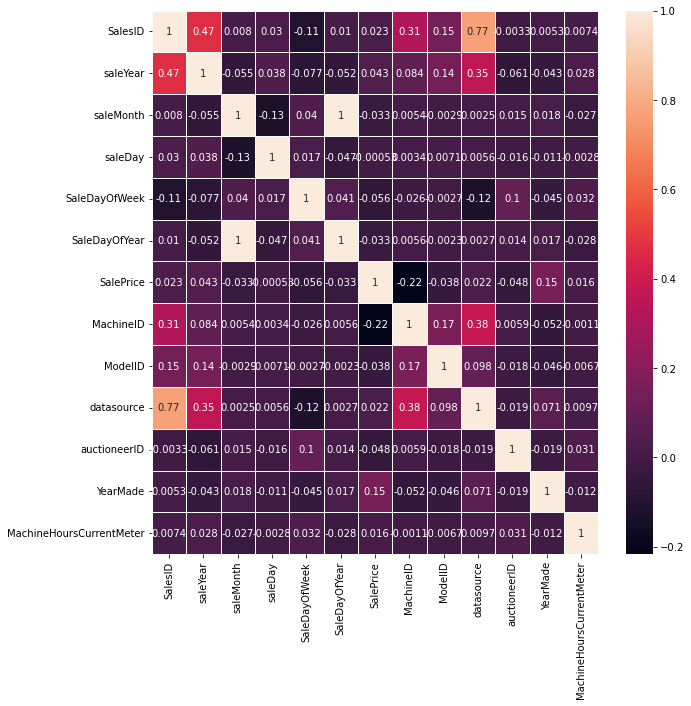

In [115]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(dftmp.corr(), annot=True, linewidths=.5, ax=ax)

## 5. Modeling

We done enough EDA(we could always do more) but let's start do model-driven EDA.


In [116]:
# Let's build a machine learning model.

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1, random_state=1234)

X = dftmp.drop('SalePrice', axis=1)
Y = dftmp['SalePrice']

#rfr.fit(X, Y)

In [117]:
# We need to convert String values into int before that we need to deal with missing values.
pd.api.types.is_string_dtype(dftmp['saleMonth'])

False

In [118]:
#Find the Column which is String/object dtypes:

for column, values in dftmp.items():
    if pd.api.types.is_string_dtype(values):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [129]:
dftmp = df_tmp.copy()

In [130]:
# Convert all the object dtpye column into number:
for column, value in dftmp.items():
    if pd.api.types.is_string_dtype(value):
        dftmp[column] = value.astype('category').cat.as_ordered()
        

In [132]:
dftmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True)